In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reading_the_file(imgPath):
    image = cv2.imread(imgPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB
    plt.imshow(image)
    # plt.axis('off')  # this will hide the a and y axis from the image plot
    # plt.show()
    return image

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_24128\1327913108.py:1: SyntaxWarning: invalid escape sequence '\i'
  imgPath ="uploads\image.jpeg"


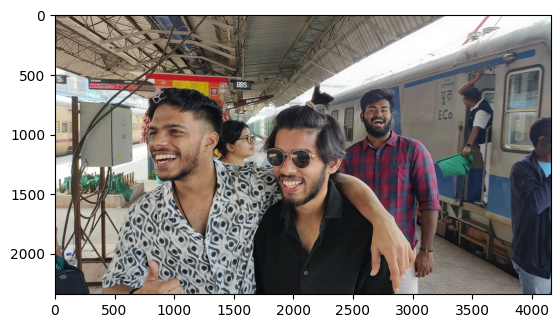

In [3]:
imgPath ="enter_your_image_path"
image=reading_the_file(imgPath)
original=np.copy(image)

In [4]:
def edge_mask(img, NoOfLines, blurVal):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blurVal)
    IMGedges = cv2.adaptiveThreshold(gray_blur, 255, cv2.THRESH_BINARY, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, NoOfLines, blurVal)
    return IMGedges

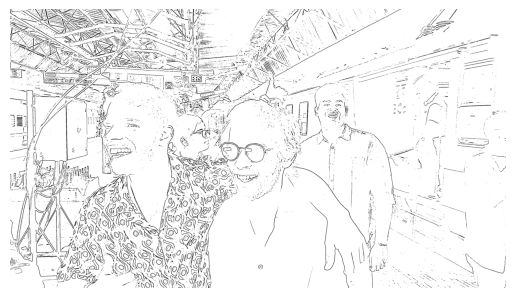

In [5]:
NoOfLines, blurVal = 7, 7
IMGedges=edge_mask(image, NoOfLines, blurVal)

plt.imshow(IMGedges,cmap='binary')
plt.axis('off')
plt.show()

REDUCE THE COLOR PALETTE

In [6]:


def color_quantization_of_image(image, numberofColors):
   FloatArray = np.float32(image).reshape((-1, 3))
   criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

   #k-means clusteriing
   ret, label, center = cv2.kmeans(FloatArray, numberofColors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
   center = np.uint8(center)
   result = center[label.flatten()]
   reshaped = result.reshape(image.shape)
   return reshaped

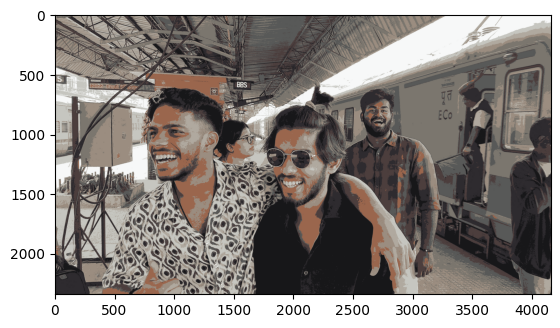

In [7]:
image = color_quantization_of_image(image, numberofColors=10)
plt.imshow(image)
plt.show()

REDUCING THE NOISE

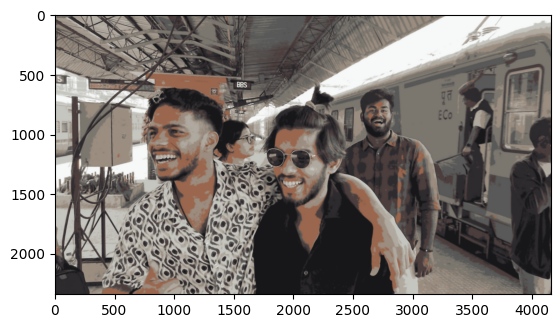

In [8]:
blurredImg = cv2.bilateralFilter(image, d=15, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurredImg)
plt.show()

SHARPENING IMAGE

In [9]:
# sharpenFilter=np.array([[-1,-1,-1],
#                 [-1,9,-1],
#                 [-1,-1,-1]])
# sharpened = cv2.filter2D(blurredImg, -1, sharpenFilter)
# plt.imshow(sharpened)

COMBINING EDGE MASKED AND BLURRED IMAGE

In [10]:
def converting_to_cartoon_image():
    converted = cv2.bitwise_and(blurredImg, blurredImg, mask=IMGedges)

    plt.imshow(blurredImg)
    plt.title("Cartoonified Image")
    plt.axis("off")
    plt.show()
    
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

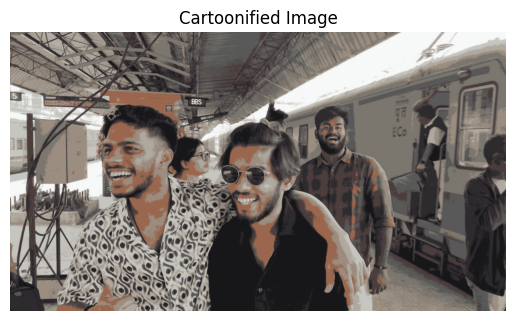

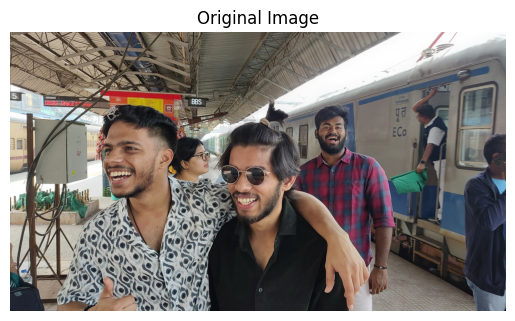

In [11]:
converting_to_cartoon_image()